In [20]:
%matplotlib inline
import sympy as sym
from sympy import Function
from sympy.solvers import solve
from sympy.plotting import plot
sym.init_printing()
#t = sym.Symbol('t')
z = sym.Symbol('z')
#f = sym.symbols('f', cls=Function)
#g = sym.symbols('g', cls=Function)
Tm = sym.Symbol('Tm') # f(t) 
H = sym.Symbol('H0') # g(t) # homogenous radiogenic heating in W m^-3
k = sym.Symbol('k')
d = sym.Symbol('d') # lid thickness
#q0 = sym.Symbol('q0')
Ts = sym.Symbol('Ts')
#Tl = sym.Symbol('Tl')
a_rh = sym.Symbol('a_rh')
Ea = sym.Symbol('Ea')
R_b = sym.Symbol('R_b')
Rp = sym.Symbol('Rp')
Rc = sym.Symbol('Rc')
Ra_crit = sym.Symbol('Ra_crit')
rho = sym.Symbol('rho')
alpha = sym.Symbol('alpha')
g_sfc = sym.Symbol('g_sfc')
kappa = sym.Symbol('kappa')
#hm = sym.Symbol('hm') # mantle thickness
eta0 = sym.Symbol('eta0')
T0 = sym.Symbol('T0')
beta = sym.Symbol('beta')
tau_rad = sym.Symbol('tau_rad')
delta_ubl = sym.Symbol('delta_ubl')


# some values from Thiriet+ 2019 (Mars1)
Tm0 = 1750
H_t0 = 1.6255113699999997e-08#23e-12*3500 #9.24e-6 # from Annual Reviews Furling & Chapman
tau_rad = 2.94e9*3.154e7 # convert to seconds
d0 = 1020e3#300e3
#dTmdt0 = 250/(500e6*3.154e7)
values = {k:4, beta:1/3, g_sfc:3.7, kappa:1e-6, Ra_crit:450, Rc:1700e3, Rp:3400e3, rho:3500, T0:1600, 
          eta0:1e21, alpha:2.5e-5, R_b:8.3144598, Ea:300e3, a_rh:2.54, Ts:250, tau_rad:2.94e9*3.154e7,
          H:H_t0#H:0,, 
          #Tm:Tm0, 
          #d:d0
          }


In [21]:
# derive expression for T(z)
eta = eta0*sym.exp(Ea/R_b * (Tm**-1 - T0**-1))
deltaT_rh = -R_b*Tm**2/Ea
Tl = Tm + a_rh*deltaT_rh

#hm = Rp - d - delta_ubl - Rc
#Ra_rh = rho*alpha*(Rp - Rc)**3*g_sfc/(kappa*eta) * (Tm-Tl) 
delta_ubl = (Ra_crit*kappa*eta/(alpha*rho*g_sfc*(Tm-Tl)))**(1/3)  #(h)*(Ra_crit/Ra_rh)**beta
q_bl = k*(Tm-Tl)/delta_ubl
q_s = q_bl + H*d # surface heat flux 
T_z = -H/(2*k)*(z)**2 - q_s/k*(z) + Ts
#sym.pprint(T_z)
#sym.latex(T_z)
sym.pprint(eta.subs(values).subs(Tm, Tm0))
sym.pprint(q_bl.subs(values).subs(Tm, Tm0))
sym.pprint(delta_ubl.subs(values).subs(Tm, Tm0))

1.44720755374258e+20
0.00882495030331215
97717.0438304164


In [ ]:
solve(T_z.subs(values).subs(z, -d) - Tl)

In [15]:
# try to solve the above, assuming nothing about d0
# find intersection of Tl(Tm) and T(z=d)



Tl_sub = T_z.subs(values).subs(z, -d).subs(Tm,Tm0) # expression for Tl from T(z) profile
d_1 = solve(Tl_sub - Tl.subs(values).subs(Tm,Tm0), d)
sym.pprint(d_1) # in m

# yay
# this only works if you sub in Tm first and then solve for d


[-1505644.49922643, 419838.461054929]


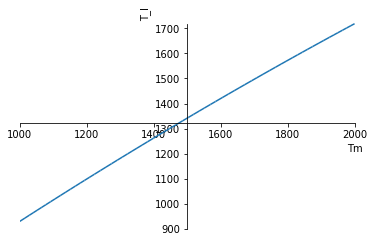

                         ⎛                                           -0.333333
                         ⎜                        ⎛ 36081.7187425694⎞         
                         ⎜                        ⎜ ────────────────⎟         
                         ⎜                        ⎜        Tm       ⎟         
                         ⎜                      2 ⎜ℯ                ⎟         
                       d⋅⎜1.91597619769931e-8⋅Tm ⋅⎜─────────────────⎟         
                         ⎜                        ⎜         2       ⎟         
                   2     ⎝                        ⎝       Tm        ⎠         
- 2.0318892125e-9⋅d  + ───────────────────────────────────────────────────────
                                                                4             

333333333                  ⎞      
                           ⎟      
                           ⎟      
                           ⎟      
                           ⎟      
          + 1.62551137e-8⋅d⎟      

ValueError: The same variable should be used in all univariate expressions being plotted.

In [19]:
plot(Tl.subs(values), (Tm, 1000, 2000), ylabel='T_l')
sym.pprint(T_z.subs(values).subs(z, -d))
plot(T_z.subs(values).subs(z, -d), (d, 0, -500e3), ylabel='T(z=-d)') # this requires subbing d for d(Tm)